In [1]:
from tp_arbres_source import rand_checkers 

In [2]:
data = rand_checkers(n1=100, n2=100, n3=100, n4=100, sigma=0.1)
X,y = data[:, :-1], data[:, -1]

In [3]:
# train logistic regression classifier
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='ovr')
log_reg.fit(X, y)
# repoort error rate 
print('Error rate: %.2f' % (1 - log_reg.score(X, y)))


Error rate: 0.81


In [4]:
# compare with a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
tree_reg = DecisionTreeClassifier()
tree_reg.fit(X, y)
print('Error rate: %.2f' % (1 - tree_reg.score(X, y)))

Error rate: 0.00


In [5]:
# the tree have a 0 rate of error since it fit perfectly the data ,
#  we cant say that the tree is better than the logistic regression since it can be a overfitting problem . 
# or the fact that the tree is more felexible at fitting the data (and capturing splits that reduce variance in data )
# the logreg in the other hand is a linear model (more bias ) 
# lets check the error rate of  our models on  scenaro when we have unseen data . 

In [6]:
data = rand_checkers(n1=150, n2=150, n3=150, n4=150, sigma=0.1)
X,y = data[:, :-1], data[:, -1]
# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# train logistic regression classifier
log_reg = LogisticRegression(multi_class='ovr')
log_reg.fit(X_train, y_train)
# repoort error rate
print('Error rate: %.2f' % (1 - log_reg.score(X_test, y_test)))
# compare with a decision tree classifier
tree_reg = DecisionTreeClassifier()
tree_reg.fit(X_train, y_train)
print('Error rate: %.2f' % (1 - tree_reg.score(X_test, y_test)))



Error rate: 0.74
Error rate: 0.18


In [7]:
# we can see that the tree is still better than the logistic regression but with a n oberfittign on the data . 


In [8]:
model_coefs = dict(zip( log_reg.classes_ , list(log_reg.coef_) ))
model_coefs

{0.0: array([-0.00192689, -0.07313372]),
 1.0: array([-0.08754349,  0.06624716]),
 2.0: array([0.00032961, 0.01560982]),
 3.0: array([ 0.08560106, -0.00550473])}

In [9]:
# since we re using oov strategy the model output 4 set of coefs (pair for each class ) 
# we have two coefs for two variables . 

In [10]:
# intercept 
model_coefs = dict(zip( log_reg.classes_ , list(log_reg.intercept_) ))
model_coefs

{0.0: -1.0678901159228773,
 1.0: -1.1716240224741175,
 2.0: -1.082862595718615,
 3.0: -1.0821783986231759}

In [11]:
# log_reg.score is a function that returns the accuracy of the trained model (after fit method ) on a given set .  
print(log_reg.score)

<bound method ClassifierMixin.score of LogisticRegression(multi_class='ovr')>


In [12]:
# load zipcode data
from sklearn.datasets import load_digits
data = load_digits()
X,y = data.data, data.target


In [13]:
from sklearn.model_selection import cross_val_score

for depth_val in range(1,20):
    # init a tree classifier
    tree_reg = DecisionTreeClassifier(max_depth=depth_val)
    # Evaluate a score by cross-validation
    scores = cross_val_score(tree_reg, X, y, cv=5)
    print('depth: %d, score: %.2f (%.2f)' % (depth_val, scores.mean(), scores.std()))
    

depth: 1, score: 0.20 (0.00)
depth: 2, score: 0.31 (0.00)
depth: 3, score: 0.43 (0.04)
depth: 4, score: 0.55 (0.05)
depth: 5, score: 0.63 (0.08)
depth: 6, score: 0.72 (0.07)
depth: 7, score: 0.75 (0.04)
depth: 8, score: 0.77 (0.04)
depth: 9, score: 0.78 (0.04)
depth: 10, score: 0.79 (0.05)
depth: 11, score: 0.78 (0.04)
depth: 12, score: 0.79 (0.04)
depth: 13, score: 0.79 (0.04)
depth: 14, score: 0.78 (0.03)
depth: 15, score: 0.78 (0.04)
depth: 16, score: 0.79 (0.03)
depth: 17, score: 0.78 (0.03)
depth: 18, score: 0.78 (0.03)
depth: 19, score: 0.79 (0.05)


In [14]:
from tp_arbres_source import plot_learning_curve
 

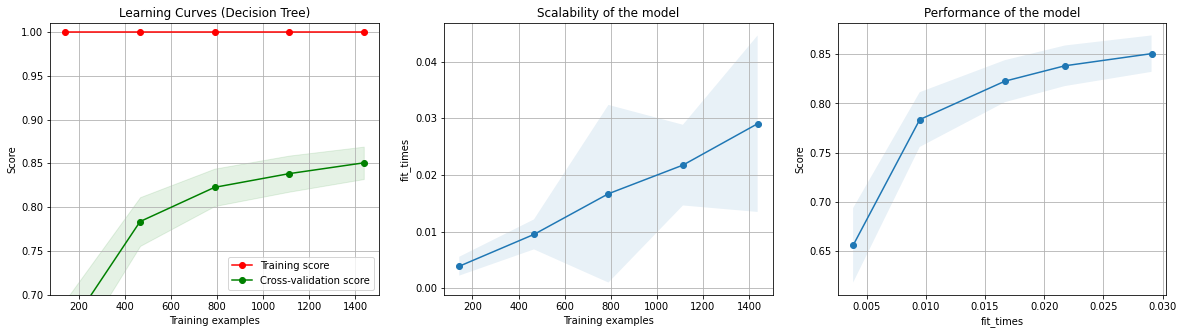

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit




title = "Learning Curves (Decision Tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier()
plot_learning_curve(
    estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)


plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

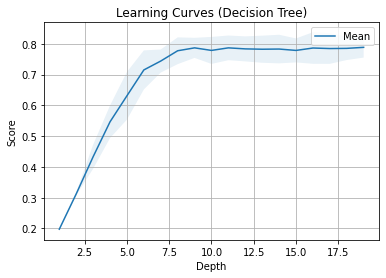

In [17]:
from tp_arbres_source import  plot_depth_curve
estimator = DecisionTreeClassifier
plot_depth_curve(estimator, title, X, y, depth_bounds=(1, 20))